<div class='heading'>
    <div style='float:left;'><h1>CPSC 4300/6300: Applied Data Science</h1></div>
    <img style="float: right; padding-right: 10px; width: 65px" src="https://raw.githubusercontent.com/bsethwalker/clemson-cs4300/main/images/clemson_paw.png"> </div>


## Week 13: Convolutional Neural Networks

**Clemson University**<br>
**Spring 2023**<br>
**Instructor(s):** Nina Hubig <br>

---

In [1]:
""" RUN THIS CELL TO GET THE RIGHT FORMATTING """
import requests
from IPython.core.display import HTML
css_file = 'https://raw.githubusercontent.com/bsethwalker/clemson-cs4300/main/css/cpsc6300.css'
styles = requests.get(css_file).text
HTML(styles)

The goal of this lab is to introduce you to the basics of convolutional neural networks.

Goals:
- Load data from the CIFAR-10 dataset using Keras
- Build a convolutional neural network
- Train the network
- Test the network
- Explore the impact of different parameters

**Note:** This lab may require more processing power than previous labs. If needed, consider using Google Colaboratory to run the code.

#### Import packages and check the version of your TensorFlow, it should be the version >2.0.0

In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
from keras.layers import Conv2D, MaxPooling2D

In [ ]:
#Checking GPU
print(len(tf.config.list_physical_devices('GPU')))

In [3]:
print(tf.__version__)

2.10.1


---------
## 1. Download and prepare the CIFAR-10 dataset
The CIFAR10 dataset contains 60,000 color images in 10 classes, with 6,000 images in each class. The dataset is divided into 50,000 training images and 10,000 testing images. The classes are mutually exclusive and there is no overlap between them.


In [4]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

#### Verify the data
To verify that the dataset looks correct, let's plot the first 25 images from the training set and display the class name below each image:

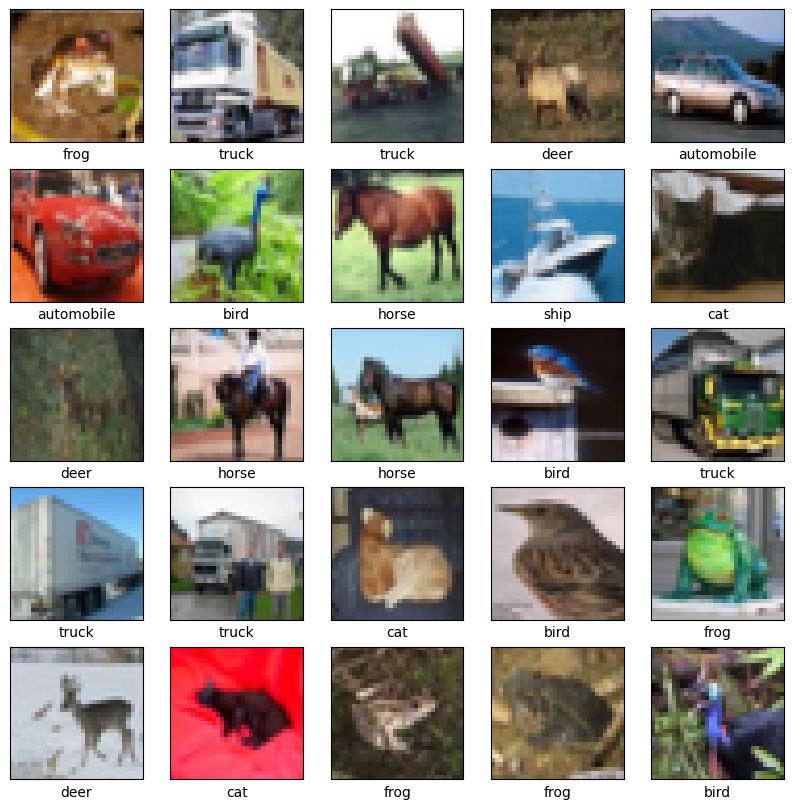

In [5]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()


## 2. Create the convolutional base
The 6 lines of code below define the convolutional base using a common pattern: a stack of Conv2D and MaxPooling2D layers.

As input, a CNN takes tensors of shape (image_height, image_width, color_channels), ignoring the batch size. If you are new to these dimensions, color_channels refers to (R,G,B). In this example, you will configure your CNN to process inputs of shape (32, 32, 3), which is the format of CIFAR images. You can do this by passing the argument input_shape to your first layer.

In [6]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

Let's display the architecture of the model so far:

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
Total params: 56,320
Trainable params: 56,320
Non-traina

Above, you can see that the output of every Conv2D and MaxPooling2D layer is a 3D tensor of shape (height, width, channels). The width and height dimensions tend to shrink as you go deeper in the network. The number of output channels for each Conv2D layer is controlled by the first argument (e.g., 32 or 64). Typically, as the width and height shrink, you can afford (computationally) to add more output channels in each Conv2D layer.

#### Add Dense layers on top
To complete the model, you will feed the last output tensor from the convolutional base (of shape (4, 4, 64)) into one or more Dense layers to perform classification. Dense layers take vectors as input (which are 1D), while the current output is a 3D tensor. First, you will flatten (or unroll) the 3D output to 1D, then add one or more Dense layers on top. CIFAR has 10 output classes, so you use a final Dense layer with 10 outputs.

In [8]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

Here's the complete architecture of your model:

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 1024)              0

The network summary shows that (4, 4, 64) outputs were flattened into vectors of shape (1024) before going through two Dense layers.

#### Compile and train the model

In [10]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 [==============================] - 14s 5ms/step - loss: 1.5520 - accuracy: 0.4345 - val_loss: 1.2977 - val_accuracy: 0.5312
Epoch 2/10
1563/1563 [==============================] - 7s 5ms/step - loss: 1.1934 - accuracy: 0.5777 - val_loss: 1.1389 - val_accuracy: 0.5936
Epoch 3/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.0401 - accuracy: 0.6355 - val_loss: 1.0337 - val_accuracy: 0.6370
Epoch 4/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.9456 - accuracy: 0.6669 - val_loss: 0.9774 - val_accuracy: 0.6618
Epoch 5/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.8737 - accuracy: 0.6941 - val_loss: 0.9265 - val_accuracy: 0.6791
Epoch 6/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.8193 - accuracy: 0.7141 - val_loss: 0.8660 - val_accuracy: 0.6966
Epoch 7/10
1563/1563 [==============================] - 7s 5ms/step - loss: 0.7722 - accuracy: 0.7290 - val_loss: 0.8535 - val_accuracy

#### Evaluate the model

313/313 - 1s - loss: 0.9097 - accuracy: 0.6888 - 664ms/epoch - 2ms/step


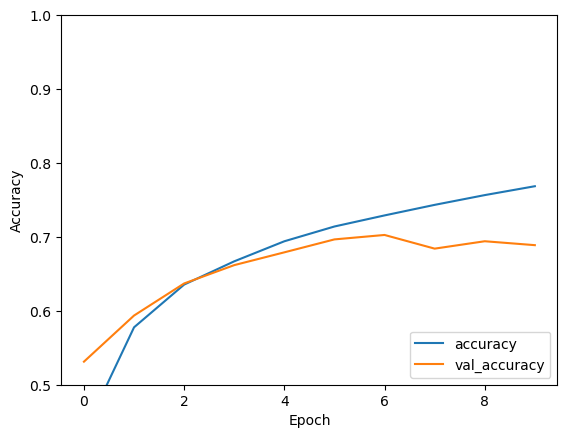

In [11]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

In [12]:
print(test_acc)

0.6887999773025513


Your simple CNN has achieved a test accuracy of over 70%. Not bad for a few lines of code!

<div class="exercise"><b>Exercise</b></div>

* List at least 3 parameters that could be tuned to improve the accuracy of your model.
* Pick at least one of those parameter and modify it. If you choose to change multiple parameters, I recommend changing one at a time. This will allow you to see the impact of each parameter changed a little more clearly.
* How does the accuracy of your model change? 
* What could be the reason for this change? Really think about the reasoning.

You can modify the network either in a new cell below or in the cells above. Just be sure that the modified code is included in the notebook before you submit it. Record both the original accuracy and the new accuracy with your other responses below.

<b>ANSWERS -</b><br>
The 3 parameters that can be tuned for accuracy -

<b>Number of Convolutional Layers: </b><br>
To find the best number of convolutional layers for a specific dataset, one can either increase or decrease the number of layers. Increasing the number of convolutional layers can help the model identify more intricate features, while decreasing the number of layers can prevent the model from overfitting.

In [13]:


model1 = models.Sequential()
model1.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model1.add(MaxPooling2D((2, 2)))
model1.add(Conv2D(64, (3, 3), activation='relu'))
model1.add(MaxPooling2D((2, 2)))
model1.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model1.add(MaxPooling2D((2, 2), padding='same'))
model1.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model1.add(MaxPooling2D((2, 2), padding='same'))
model1.add(layers.Flatten())
model1.add(layers.Dense(64, activation='relu'))
model1.add(layers.Dense(10, activation='softmax'))

model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 6, 6, 128)         73856     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 3, 3, 128)       

In [14]:
model11 = models.Sequential()
model11.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model11.add(MaxPooling2D((2, 2)))
model11.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model11.add(MaxPooling2D((2, 2), padding='same'))
model11.add(layers.Flatten())
model11.add(layers.Dense(64, activation='relu'))
model11.add(layers.Dense(10, activation='softmax'))

model11.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 15, 15, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 4096)              0         
                                                                 
 dense_4 (Dense)             (None, 64)               

In [15]:
model1.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

history1 = model1.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.4748 - accuracy: 0.4602 - val_loss: 1.1200 - val_accuracy: 0.6013
Epoch 2/10
1563/1563 [==============================] - 10s 6ms/step - loss: 1.0272 - accuracy: 0.6367 - val_loss: 0.9669 - val_accuracy: 0.6642
Epoch 3/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.8327 - accuracy: 0.7088 - val_loss: 0.8895 - val_accuracy: 0.6934
Epoch 4/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.6975 - accuracy: 0.7575 - val_loss: 0.8196 - val_accuracy: 0.7159
Epoch 5/10
1563/1563 [==============================] - 11s 7ms/step - loss: 0.5862 - accuracy: 0.7950 - val_loss: 0.8753 - val_accuracy: 0.7115
Epoch 6/10
1563/1563 [==============================] - 12s 7ms/step - loss: 0.4848 - accuracy: 0.8309 - val_loss: 0.8445 - val_accuracy: 0.7300
Epoch 7/10
1563/1563 [==============================] - 9s 5ms/step - loss: 0.3953 - accuracy: 0.8618 - val_loss: 0.9008 - val_accura

In [16]:
model11.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

history11 = model11.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.4310 - accuracy: 0.4866 - val_loss: 1.1530 - val_accuracy: 0.5886
Epoch 2/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.0565 - accuracy: 0.6276 - val_loss: 0.9942 - val_accuracy: 0.6514
Epoch 3/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.9264 - accuracy: 0.6771 - val_loss: 0.9326 - val_accuracy: 0.6738
Epoch 4/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.8372 - accuracy: 0.7088 - val_loss: 0.9627 - val_accuracy: 0.6687
Epoch 5/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.7723 - accuracy: 0.7332 - val_loss: 0.9049 - val_accuracy: 0.6856
Epoch 6/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.7147 - accuracy: 0.7522 - val_loss: 0.8899 - val_accuracy: 0.6961
Epoch 7/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.6644 - accuracy: 0.7676 - val_loss: 0.9161 - val_accuracy:

313/313 - 1s - loss: 1.2197 - accuracy: 0.7174 - 912ms/epoch - 3ms/step
313/313 - 1s - loss: 0.9772 - accuracy: 0.6885 - 875ms/epoch - 3ms/step


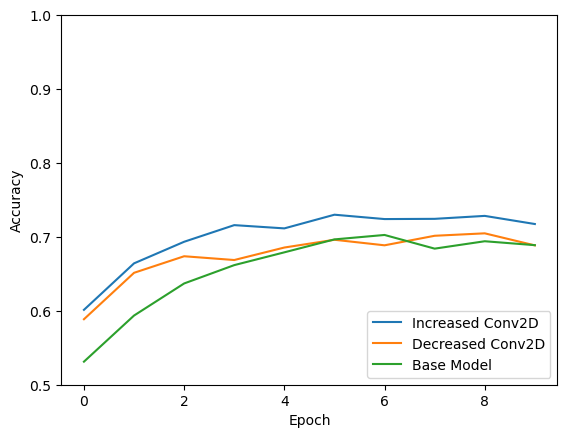

In [17]:
plt.plot(history1.history['val_accuracy'], label='Increased Conv2D')
plt.plot(history11.history['val_accuracy'], label='Decreased Conv2D')
plt.plot(history.history['val_accuracy'], label = 'Base Model')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss1, test_acc1 = model1.evaluate(test_images,  test_labels, verbose=2)
test_loss11, test_acc11 = model11.evaluate(test_images,  test_labels, verbose=2)

In [18]:
print('TEST ACCURACY')
print(f'Increased Conv2D Model Accuracy --> {test_acc1:.2f}%\nDecreased Conv2D Model Accuracy --> {test_acc11:.2f}%\nBase Model Accuracy --> {test_acc:.2f}%')

TEST ACCURACY
Increased Conv2D Model Accuracy --> 0.72%
Decreased Conv2D Model Accuracy --> 0.69%
Base Model Accuracy --> 0.69%


<b> Effect of changing number of convolutional layers </b><br>
In our case, accuracy improved upon increasing the number of convolutional layers as adding more convolutional layers can sometimes improve accuracy by allowing the model to learn more complex features. But too many layers can lead to overfitting, where the model becomes too specialized to the training data and may perform poorly on new data. On the other hand, reducing the number of convolutional layers can prevent overfitting and improve the model's ability to generalize to new data, but may also result in the loss of some useful features. Therefore, the optimal number of convolutional layers for a given dataset needs to be determined through experimentation and evaluation.

<b>Filter Size: </b><br>
The size of the filters used in a convolutional neural network can be adjusted to optimize the model's performance for a specific dataset. By increasing the filter size, the model may be able to extract more information from the input image. Conversely, reducing the filter size may make the model more sensitive to smaller details in the image.

In [19]:
model2 = models.Sequential()
model2.add(Conv2D(32, (5, 5), activation='relu', input_shape=(32, 32, 3)))
model2.add(MaxPooling2D((2, 2)))
model2.add(Conv2D(64, (5, 5), activation='relu'))
model2.add(MaxPooling2D((2, 2)))
model2.add(Conv2D(128, (5, 5), activation='relu'))
model2.add(MaxPooling2D((2, 2), padding='same'))
model2.add(layers.Flatten())
model2.add(layers.Dense(64, activation='relu'))
model2.add(layers.Dense(10, activation='softmax'))

model2.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 28, 28, 32)        2432      
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 10, 10, 64)        51264     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_11 (Conv2D)          (None, 1, 1, 128)         204928    
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 1, 1, 128)       

In [20]:
model21 = models.Sequential()
model21.add(Conv2D(32, (1, 1), activation='relu', input_shape=(32, 32, 3)))
model21.add(MaxPooling2D((2, 2)))
model21.add(Conv2D(64, (1, 1), activation='relu'))
model21.add(MaxPooling2D((2, 2)))
model21.add(Conv2D(128, (1, 1), activation='relu'))
model21.add(MaxPooling2D((2, 2), padding='same'))
model21.add(layers.Flatten())
model21.add(layers.Dense(64, activation='relu'))
model21.add(layers.Dense(10, activation='softmax'))

model21.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 32, 32, 32)        128       
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 16, 16, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 16, 16, 64)        2112      
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 8, 8, 64)         0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 8, 8, 128)         8320      
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 4, 4, 128)       

In [21]:
model2.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

history2 = model2.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 [==============================] - 10s 6ms/step - loss: 1.5770 - accuracy: 0.4217 - val_loss: 1.3490 - val_accuracy: 0.5155
Epoch 2/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.2441 - accuracy: 0.5557 - val_loss: 1.2699 - val_accuracy: 0.5557
Epoch 3/10
1563/1563 [==============================] - 7s 5ms/step - loss: 1.0885 - accuracy: 0.6148 - val_loss: 1.1040 - val_accuracy: 0.6110
Epoch 4/10
1563/1563 [==============================] - 7s 5ms/step - loss: 0.9877 - accuracy: 0.6534 - val_loss: 1.0236 - val_accuracy: 0.6394
Epoch 5/10
1563/1563 [==============================] - 7s 5ms/step - loss: 0.9024 - accuracy: 0.6813 - val_loss: 1.0255 - val_accuracy: 0.6436
Epoch 6/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.8349 - accuracy: 0.7057 - val_loss: 1.0039 - val_accuracy: 0.6554
Epoch 7/10
1563/1563 [==============================] - 7s 5ms/step - loss: 0.7791 - accuracy: 0.7243 - val_loss: 1.0190 - val_accuracy

In [22]:
model21.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

history21 = model21.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.6757 - accuracy: 0.3993 - val_loss: 1.4475 - val_accuracy: 0.4771
Epoch 2/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.4123 - accuracy: 0.4972 - val_loss: 1.3987 - val_accuracy: 0.4986
Epoch 3/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.3320 - accuracy: 0.5240 - val_loss: 1.3219 - val_accuracy: 0.5251
Epoch 4/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.2745 - accuracy: 0.5497 - val_loss: 1.2881 - val_accuracy: 0.5357
Epoch 5/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.2326 - accuracy: 0.5605 - val_loss: 1.2246 - val_accuracy: 0.5604
Epoch 6/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.2006 - accuracy: 0.5756 - val_loss: 1.2170 - val_accuracy: 0.5652
Epoch 7/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.1707 - accuracy: 0.5853 - val_loss: 1.1931 - val_accuracy:

313/313 - 2s - loss: 1.0051 - accuracy: 0.6799 - 2s/epoch - 6ms/step
313/313 - 1s - loss: 1.1632 - accuracy: 0.5874 - 1s/epoch - 3ms/step


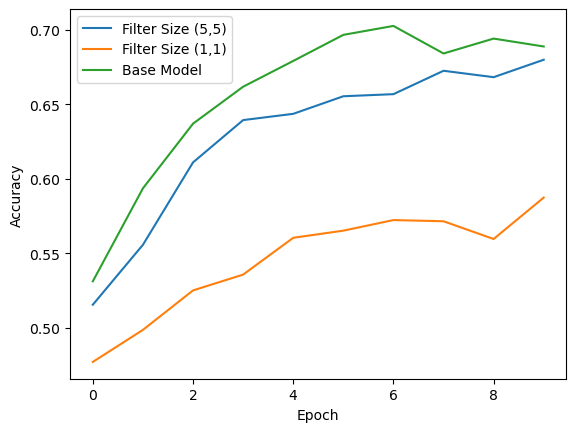

In [31]:
plt.plot(history2.history['val_accuracy'], label='Filter Size (5,5)')
plt.plot(history21.history['val_accuracy'], label='Filter Size (1,1)')
plt.plot(history.history['val_accuracy'], label = 'Base Model')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

test_loss2, test_acc2 = model2.evaluate(test_images,  test_labels, verbose=2)
test_loss21, test_acc21 = model21.evaluate(test_images,  test_labels, verbose=2)

In [25]:
print("TEST ACCURACY")
print(f'Filter Size (5,5) Model Accuracy --> {test_acc2:.2f}%\nFilter Size (1,1) Model Accuracy --> {test_acc21:.2f}%\nBase Model Accuracy --> {test_acc:.2f}%')

TEST ACCURACY
Filter Size (5,5) Model Accuracy --> 0.68%
Filter Size (1,1) Model Accuracy --> 0.59%
Base Model Accuracy --> 0.69%


<b>Learning Rate: </b><br>
The learning rate determines how quickly the model learns from the data. A smaller learning rate may lead to slower but more accurate learning, while a larger learning rate may lead to faster but less accurate learning. Tuning the learning rate can help find the optimal balance between speed and accuracy for the given dataset.

In [26]:
model3 = models.Sequential()
model3.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model3.add(MaxPooling2D((2, 2)))
model3.add(Conv2D(64, (3, 3), activation='relu'))
model3.add(MaxPooling2D((2, 2)))
model3.add(Conv2D(128, (3, 3), activation='relu'))
model3.add(MaxPooling2D((2, 2)))
model3.add(layers.Flatten())
model3.add(layers.Dense(64, activation='relu'))
model3.add(layers.Dense(10, activation='softmax'))

model3.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 15, 15, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_16 (Conv2D)          (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 6, 6, 64)         0         
 g2D)                                                            
                                                                 
 conv2d_17 (Conv2D)          (None, 4, 4, 128)         73856     
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 2, 2, 128)       

In [27]:
from tensorflow.keras.optimizers import Adam
adam = Adam(learning_rate=0.0001)
model3.compile(optimizer=adam,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

history3 = model3.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))

test_loss3, test_acc3 = model3.evaluate(test_images,  test_labels, verbose=2)

Epoch 1/10
1563/1563 [==============================] - 9s 5ms/step - loss: 1.8254 - accuracy: 0.3405 - val_loss: 1.5898 - val_accuracy: 0.4305
Epoch 2/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.5134 - accuracy: 0.4579 - val_loss: 1.4701 - val_accuracy: 0.4737
Epoch 3/10
1563/1563 [==============================] - 7s 5ms/step - loss: 1.4075 - accuracy: 0.4970 - val_loss: 1.3708 - val_accuracy: 0.5134
Epoch 4/10
1563/1563 [==============================] - 7s 5ms/step - loss: 1.3344 - accuracy: 0.5254 - val_loss: 1.3099 - val_accuracy: 0.5372
Epoch 5/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.2750 - accuracy: 0.5513 - val_loss: 1.2649 - val_accuracy: 0.5502
Epoch 6/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.2254 - accuracy: 0.5663 - val_loss: 1.2181 - val_accuracy: 0.5739
Epoch 7/10
1563/1563 [==============================] - 7s 5ms/step - loss: 1.1815 - accuracy: 0.5847 - val_loss: 1.1921 - val_accuracy:

In [ ]:
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '-1'

In [28]:
from tensorflow.keras.optimizers import Adam
adam = Adam(learning_rate=1)
model3.compile(optimizer=adam,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

history31 = model3.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 [==============================] - 14s 8ms/step - loss: 877508.0625 - accuracy: 0.1017 - val_loss: 2.4121 - val_accuracy: 0.1000
Epoch 2/10
1563/1563 [==============================] - 12s 8ms/step - loss: 2.4092 - accuracy: 0.0997 - val_loss: 2.3687 - val_accuracy: 0.1000
Epoch 3/10
1563/1563 [==============================] - 12s 8ms/step - loss: 2.4154 - accuracy: 0.0998 - val_loss: 2.3640 - val_accuracy: 0.1000
Epoch 4/10
1563/1563 [==============================] - 13s 8ms/step - loss: 2.4064 - accuracy: 0.1010 - val_loss: 2.5842 - val_accuracy: 0.1000
Epoch 5/10
1563/1563 [==============================] - 13s 8ms/step - loss: 2.4084 - accuracy: 0.1008 - val_loss: 2.3578 - val_accuracy: 0.1000
Epoch 6/10
1563/1563 [==============================] - 13s 8ms/step - loss: 2.4025 - accuracy: 0.1006 - val_loss: 2.3605 - val_accuracy: 0.1000
Epoch 7/10
1563/1563 [==============================] - 12s 8ms/step - loss: 2.4128 - accuracy: 0.0992 - val_loss: 2.3898 - v

313/313 - 1s - loss: 2.3331 - accuracy: 0.1000 - 1s/epoch - 4ms/step


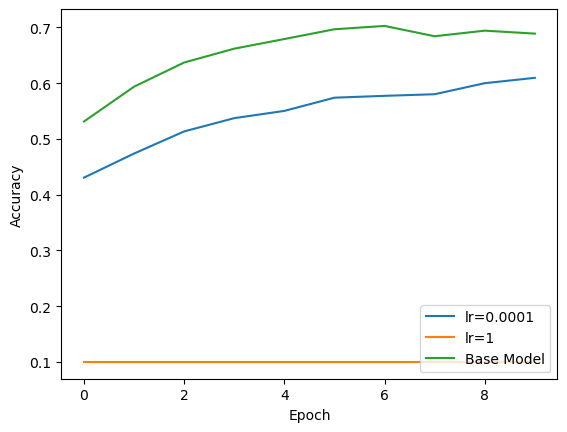

In [29]:
plt.plot(history3.history['val_accuracy'], label='lr=0.0001')
plt.plot(history31.history['val_accuracy'], label='lr=1')
plt.plot(history.history['val_accuracy'], label = 'Base Model')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

test_loss31, test_acc31 = model3.evaluate(test_images,  test_labels, verbose=2)

In [30]:
print(f'lr=0.0001 Model Accuracy --> {test_acc3:.2f}%\nlr=1 Model Accuracy --> {test_acc31:.2f}%\nBase Model Accuracy --> {test_acc:.2f}%')

lr=0.0001 Model Accuracy --> 0.61%
lr=1 Model Accuracy --> 0.10%
Base Model Accuracy --> 0.69%


References:
- https://www.tensorflow.org/tutorials/images/cnn
- https://www.tensorflow.org/tutorials/quickstart/advanced